In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
class Value:
    def __init__(self, value, children = (), op = '', label = ""):
        self.value = value
        self.prev = set(children)
        self.op = op
        # backward
        self.backward = lambda : None

        self.label = label
        self.grad = 0.0

    def __repr__(self) -> str:
        return (f"(Value = {self.value})")
    
    def __add__ (self, other):
        out = Value(self.value + other.value, children=(self, other), op='+')

        def backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out.backward = backward

        return out
    
    def __mul__ (self, other):
        out = Value(self.value * other.value, children=(self, other), op='*')

        def backward():
            self.grad = other.value * out.grad
            other.grad = self.value * out.grad
        

        out.backward = backward
        return out
    
    def tanh(self):
        x = self.value
        t = ((math.exp(2*x) - 1)/(math.exp(2*x) + 1))
        out = Value(t, (self, ), 'tanh')

        def backward():
            self.grad = (1-t**2) * out.grad

        out.backward = backward

        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
print(L.value)
# print(d)
# print(d.op)

-8.0


In [3]:
from graphviz import Digraph
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw(root):
    dot = Digraph(format='svg', graph_attr = {'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = '{%s|data %.4f|grad %.4f}'%(n.label,n.value, n.grad), shape='record')
        if n.op:
            dot.node(name = uid + n.op, label = n.op)
            dot.edge(uid+n.op , uid)
        
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2.op)

    return dot

### The same example as discussed in the `Manual_Approach.ipynb` notebook

In [4]:
# inputs 
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'


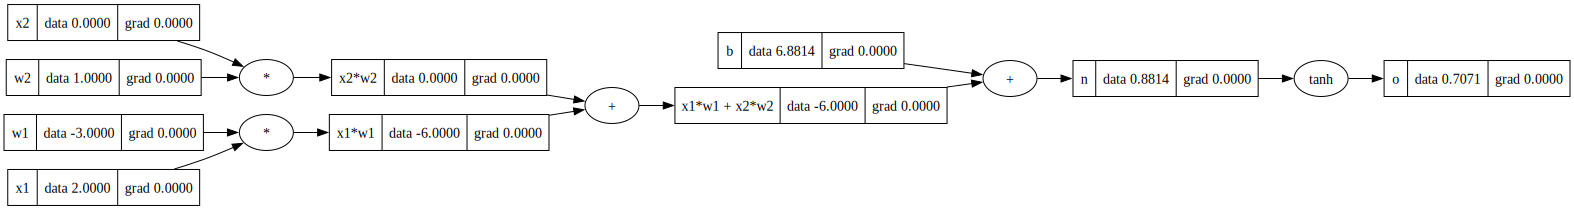

In [5]:
draw(o)

In [6]:
o.grad = 1.0


In [7]:
o.backward()
n.backward()
x1w1x2w2.backward()
x1w1.backward()
x2w2.backward()
x1.backward()